# Supplement: Structural validation plots of manipulated connectomes

Computed layer-wise connection probabilities of manipulated connectomes and differences to baseline.

<u>Required input data</u>:

Download and uncompress `simulation.xz`, containing simulation data including connectivity matrices in [ConnectomeUtilities](https://github.com/BlueBrain/ConnectomeUtilities) format, into a root folder.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from conntility import ConnectivityMatrix

In [2]:
save_path = './figs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
# save_path = None

In [6]:
root = '/gpfs/bbp.cscs.ch/data/scratch/proj9/bisimplices/ZENODO_simulation'  # Root folder of the connectivity matrices
conn_file = 'working_dir/connectome.h5'  # Connectome file rel. to each of the simulation folders

conn_files = {
    'Baseline': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_Baseline/{conn_file}', 'group': 'baseline'},
    
    'Order 1': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order1/{conn_file}', 'group': 'remove_struct'},
    'Order 2': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order2/{conn_file}', 'group': 'remove_struct'},
    'Order 3': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order3/{conn_file}', 'group': 'remove_struct'},
    'Order 4': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order4/{conn_file}', 'group': 'remove_struct'},
    'Order 5': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order5/{conn_file}', 'group': 'remove_struct'},

    '100k': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewireEnhanced100K/{conn_file}', 'group': 'add_struct'},
    '200k': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewireEnhanced200K/{conn_file}', 'group': 'add_struct'},
    '300k': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewireEnhanced300K/{conn_file}', 'group': 'add_struct'},
    '400k': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewireEnhanced400K/{conn_file}', 'group': 'add_struct'},
    '500k': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewireEnhanced500K/{conn_file}', 'group': 'add_struct'},
    '670k': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnRewireEnhanced670K/{conn_file}', 'group': 'add_struct'},

    'RC - 1':  {'file': f'{root}/BlobStimReliability_O1v5-SONATA_RecipRemoval_StructDim56/{conn_file}', 'group': 'remove_RC'},
    'RC - 2':  {'file': f'{root}/BlobStimReliability_O1v5-SONATA_RecipRemoval_StructDim56_456/{conn_file}', 'group': 'remove_RC'},
    'RC - 3':  {'file': f'{root}/BlobStimReliability_O1v5-SONATA_RecipRemoval_StructDim456/{conn_file}', 'group': 'remove_RC'},
    'RC - 4':  {'file': f'{root}/BlobStimReliability_O1v5-SONATA_RecipRemoval_Unstruct-3/{conn_file}', 'group': 'remove_RC'},
    'RC* - 1': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_RecipRemoval_Unstruct-0/{conn_file}', 'group': 'remove_RC'},
    'RC* - 2': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_RecipRemoval_Unstruct-1/{conn_file}', 'group': 'remove_RC'},
    'RC* - 3': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_RecipRemoval_Unstruct-2/{conn_file}', 'group': 'remove_RC'},

    'RC + 1':  {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnAdd_RecipStruct0x2/{conn_file}', 'group': 'add_RC'},
    'RC + 2':  {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnAdd_RecipStruct0x4/{conn_file}', 'group': 'add_RC'},
    'RC + 3':  {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnAdd_RecipStruct0x8/{conn_file}', 'group': 'add_RC'},
    'RC + 4':  {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnAdd_RecipStruct0x16/{conn_file}', 'group': 'add_RC'},
    'RC* + 1': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnAdd_Control0x2/{conn_file}', 'group': 'add_RC'},
    'RC* + 2': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnAdd_Control0x4/{conn_file}', 'group': 'add_RC'},
    'RC* + 3': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnAdd_Control0x8/{conn_file}', 'group': 'add_RC'},
    'RC* + 4': {'file': f'{root}/BlobStimReliability_O1v5-SONATA_ConnAdd_Control0x16/{conn_file}', 'group': 'add_RC'},
}

group_titles = {'baseline':      'Baseline',
                'remove_struct': 'Removing structure',
                'add_struct':    'Enhancing structure',
                'remove_RC':     'Removing RCs',
                'add_RC':        'Adding RCs'}

cmaps = {'baseline':      'Greys',
         'remove_struct': 'Blues',
         'add_struct':    'Reds',
         'remove_RC':     'Greens',
         'add_RC':        'RdPu'}

diff_cmap = 'PiYG'

p_ranges = {'baseline':      3,
            'remove_struct': 3,
            'add_struct':    3,
            'remove_RC':     3,
            'add_RC':        4}  # [0, range] (%)

diff_ranges = {'baseline':      0.01,
               'remove_struct': 2,
               'add_struct':    0.2,
               'remove_RC':     0.05,
               'add_RC':        1.0}  # [-range, range] (%)

In [7]:
def get_group_keys(grp_dict, grp_name):
    return [k for k, v in grp_dict.items() if v['group'] == grp_name]


def conn_prob_by_layer(conn_file, synapse_class='EXC'):
    """Returns conn. prob. in by layer (in percent!)."""
    conn = ConnectivityMatrix.from_h5(conn_file)
    conn = conn.subpopulation(conn.gids[conn.synapse_class == synapse_class])
    conn_by_layer = conn.condense('layer')  # Number of connections

    all_count = conn.vertices['layer'].value_counts().sort_index()
    layers = all_count.index.to_numpy()
    all_count = all_count.to_numpy()
    all_count = np.expand_dims(all_count, axis=1) * np.expand_dims(all_count, axis=0)
    conn_prob = 100.0 * conn_by_layer.array / all_count

    # Expand to all layers
    all_layers = np.arange(1, np.max(layers) + 1)
    conn_prob_all = np.zeros((len(all_layers), len(all_layers)))
    lay_idx = np.array([np.where(all_layers == _lay)[0][0] for _lay in layers])
    conn_prob_all[np.expand_dims(lay_idx, axis=1), np.expand_dims(lay_idx, axis=0)] = conn_prob
    
    return all_layers, conn_prob_all


def plot_struct_res(struct_file, plot_range=[None, None], cmap='hot_r', colorbar=True, ticklabels=True, ax_off=False):
    """Plot structural results, specifically connection probability by layer."""

    if isinstance(struct_file, list):  # Compute diff
        assert len(struct_file) == 2, 'ERROR: Two results files required to compute diff!'
        layers1, conn_prob1 = conn_prob_by_layer(struct_file[0])
        layers2, conn_prob2 = conn_prob_by_layer(struct_file[1])
        assert np.array_equal(layers1, layers2), "ERROR: Layers mismatch!"
        conn_prob = conn_prob2 - conn_prob1
        layers = layers1
    else:
        layers, conn_prob = conn_prob_by_layer(struct_file)

    if plot_range is None:
        plot_range = np.nanmax(np.abs(conn_prob))
    if np.isscalar(plot_range):  # +/- symmetric
        vmin = -np.abs(plot_range)
        vmax = np.abs(plot_range)
    else:
        vmin = np.nanmin(conn_prob) if plot_range[0] is None else plot_range[0]
        vmax = np.nanmax(conn_prob) if plot_range[-1] is None else plot_range[-1]

#     print(f'Data range: [{np.nanmin(conn_prob):.3f}, {np.nanmax(conn_prob):.3f}]')
#     print(f'Plot range: [{vmin:.3f}, {vmax:.3f}]')

    h_img = plt.imshow(conn_prob, interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.xticks(range(len(layers)), layers if ticklabels else [])
    plt.yticks(range(len(layers)), layers if ticklabels else [])

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if ax_off:
        plt.axis('off')

    if colorbar:
        h_cb = plt.colorbar()
        h_cb.set_label(label='Conn. prob. (%)', size=None)
        h_cb.ax.tick_params(labelsize=None)

    return h_img


def add_cbar(h, label=None, ticks=None):
    cax = plt.gca().inset_axes([0.1, -0.75, 0.8, 0.5])
    cax.axis('off')
    h_cb = plt.colorbar(h, orientation='horizontal', aspect=10, ax=cax, label=label)
    h_cb.set_ticks(ticks)
    h_cb.set_ticklabels(ticks)
    h_cb.outline.set_linewidth(0)


/nvme/pokorny/2096078/ipykernel_243516/2393603322.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


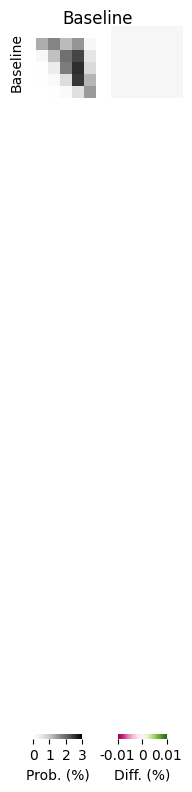

/nvme/pokorny/2096078/ipykernel_243516/2393603322.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


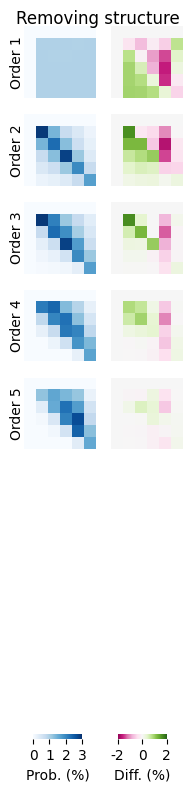

/nvme/pokorny/2096078/ipykernel_243516/2393603322.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


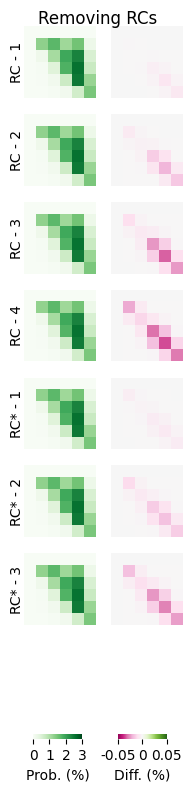

/nvme/pokorny/2096078/ipykernel_243516/2393603322.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


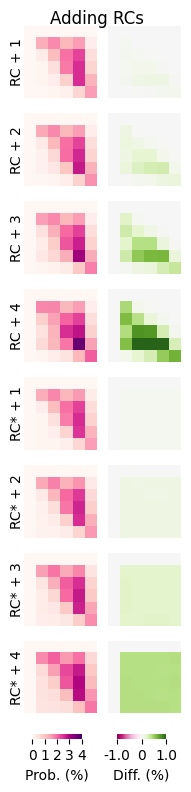

/nvme/pokorny/2096078/ipykernel_243516/2393603322.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


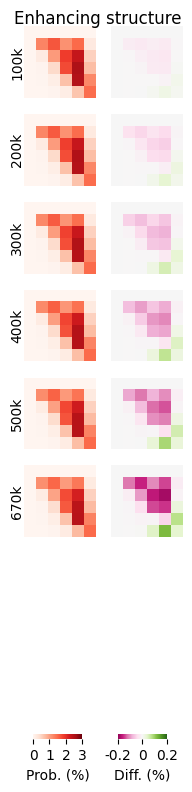

In [8]:
grid_max = 8

for group in ['baseline', 'remove_struct', 'remove_RC', 'add_RC', 'add_struct']:
    res_list = get_group_keys(conn_files, group)
    p_range = p_ranges[group]
    diff_range = diff_ranges[group]

    plt.figure(figsize=[2, 8])
    for idx in range(grid_max):
        plt.subplot(grid_max, 2, idx * 2 + 1)
        if idx < len(res_list):
            res_name = res_list[idx]
            h_res = plot_struct_res(conn_files[res_name]['file'], plot_range=[0, p_range], colorbar=False, cmap=cmaps[conn_files[res_name]['group']], ticklabels=False, ax_off=True)
            plt.text(np.min(plt.xlim()), np.mean(plt.ylim()), res_name, ha='right', va='center', rotation=90)
        else:
            plt.axis('off')
        if idx == grid_max - 1:
            add_cbar(h_res, label='Prob. (%)', ticks=range(np.floor(p_range).astype(int) + 1))

        plt.subplot(grid_max, 2, idx * 2 + 2)
        if idx < len(res_list):
            h_diff = plot_struct_res([conn_files['Baseline']['file'], conn_files[res_name]['file']], plot_range=diff_range, colorbar=False, cmap=diff_cmap, ticklabels=False, ax_off=True)
        else:
            plt.axis('off')
        if idx == grid_max - 1:
            add_cbar(h_diff, label='Diff. (%)', ticks=[-diff_range, 0, diff_range])
    plt.suptitle(group_titles[group], y=0.96)

    plt.tight_layout()
    if save_path is not None:
        plt.savefig(os.path.join(save_path, f'struct_validation__{group}.png'), dpi=600, bbox_inches='tight')
        plt.savefig(os.path.join(save_path, f'struct_validation__{group}.svg'), dpi=600, bbox_inches='tight')
        plt.savefig(os.path.join(save_path, f'struct_validation__{group}.pdf'), dpi=600, bbox_inches='tight')
    plt.show()